In [17]:
from sklearn.cluster import DBSCAN
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import normalization
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import support_file as sf

Import data

In [18]:
data = pd.read_csv("Ecommerce Customers.csv")


data_norm = normalization.normalized_dataframe
print(data_norm.head(5))

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0             0.751425     0.626620         0.929816              0.573101   
1             0.362306     0.393016         0.550801              0.359869   
2             0.524953     0.426378         0.524803              0.576396   
3             0.722409     0.787050         0.460890              0.428434   
4             0.574861     0.647702         0.594748              0.627768   

   Yearly Amount Spent  
0             0.651040  
1             0.266355  
2             0.453725  
3             0.639055  
4             0.673552  


One-Hot-Kodierung

In [19]:
data_hot_clustering = sf.data_hot_clustering
#data_hot_clustering = pd.concat([data_norm, dummies], axis=1)


data_hot_clustering = data_hot_clustering[["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent","HIGH","MEDIUM","LOW"]]
print(data_hot_clustering.head(5))

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            34.305557    13.717514        36.721283              3.120179   
3            33.871038    12.026925        34.476878              5.493507   
4            32.021596    11.366348        36.683776              4.685017   

   Yearly Amount Spent  HIGH  MEDIUM  LOW  
0           587.951054     0       1    0  
1           392.204933     0       0    1  
2           581.852344     0       0    1  
3           637.102448     1       0    0  
4           521.572175     0       1    0  


Layman's method

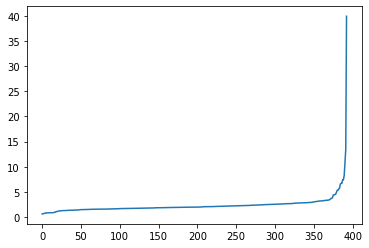

In [20]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_hot_clustering)
distances, indices = nbrs.kneighbors(data_hot_clustering)

distances = np.sort(distances, axis=0)

distances = distances[:,1]

plt.plot(distances)

In [21]:
dbscan = DBSCAN(eps=5, min_samples=20)
clusters = dbscan.fit_predict(data_hot_clustering)
#print(clusters)

Layman's method for only two dimensions

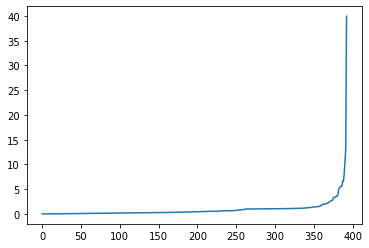

In [22]:
x = data_hot_clustering.iloc[:,[4,5]]

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

distances = np.sort(distances, axis=0)

distances = distances[:,1]

plt.plot(distances)

DBSCAN visualisation with two dimensions

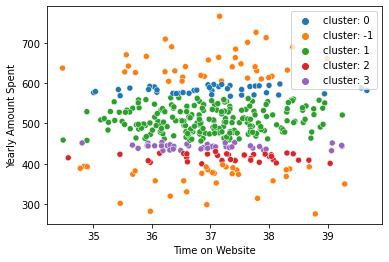

In [23]:
X = data_hot_clustering.iloc[:,[2,4]]

dbscan = DBSCAN(eps=5, min_samples=10)
clusters = dbscan.fit_predict(X)
labels = dbscan.labels_

sns.scatterplot(X.iloc[:,0], X.iloc[:,1], hue=["cluster: {}".format(i) for i in labels])
plt.show()






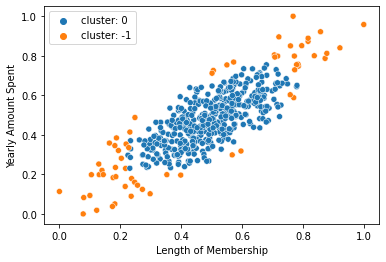

In [24]:
X = data_norm.iloc[:,[3,4]]

dbscan = DBSCAN(eps=0.05, min_samples=10)
clusters = dbscan.fit_predict(X)
labels = dbscan.labels_

sns.scatterplot(X.iloc[:,0], X.iloc[:,1], hue=["cluster: {}".format(i) for i in labels])
plt.show()

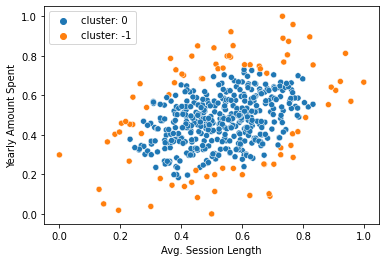

In [25]:
X = data_norm.iloc[:,[0,4]]

dbscan = DBSCAN(eps=0.05, min_samples=10)
clusters = dbscan.fit_predict(X)
labels = dbscan.labels_
#print(clusters)

sns.scatterplot(X.iloc[:,0], X.iloc[:,1], hue=["cluster: {}".format(i) for i in labels])
plt.show()